In [ ]:
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 11.4 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Tue Apr 22 12:56:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install torch torchvision qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 136.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import matplotlib.pyplot as plt

In [ ]:
# Read CSV and encode labels
csv_file = "/content/drive/MyDrive/input_files/patient_diagnosis.csv"
df = pd.read_csv(csv_file, header=None)
df.columns = ['p_no', 'diagnosis']
label_encoder = LabelEncoder()
df['encoded_diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Custom Dataset
class SpectrogramDataset(Dataset):
    def __init__(self, image_folder,label, dataframe, transform=None):
        self.label = label
        self.image_paths = glob.glob(os.path.join(image_folder, "*.png"))
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
       # patient_id = int(os.path.basename(img_path).split("_")[0])
       # label = self.df[self.df['p_no'] == patient_id]['encoded_diagnosis'].values[0]'''

        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)

        return image, self.label


In [ ]:
# Define image transform
transform = transforms.Compose([
    transforms.Resize((32, 32)),       # Resize to match CNN input (or your target)
    # transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
full_dataset = []

image_folder = "/content/drive/MyDrive/augmented_spectrograms/Asthma"
asthma = SpectrogramDataset(image_folder=image_folder, label=0, dataframe=df, transform=transform)

full_dataset.extend([asthma[0]])

len(asthma), type(asthma), len(full_dataset)

(28, __main__.SpectrogramDataset, 1)

In [ ]:
full_dataset = []

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/Bronchiectasis"
help = SpectrogramDataset(image_folder=image_folder, label=0, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(444, __main__.SpectrogramDataset, 444)

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/Bronchiolitis"
help = SpectrogramDataset(image_folder=image_folder, label=1, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(361, __main__.SpectrogramDataset, 805)

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/COPD"
help = SpectrogramDataset(image_folder=image_folder, label=2, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(793, __main__.SpectrogramDataset, 1598)

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/Healthy"
help = SpectrogramDataset(image_folder=image_folder, label=3, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(952, __main__.SpectrogramDataset, 2550)

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/Pneumonia"
help = SpectrogramDataset(image_folder=image_folder, label=4, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(1028, __main__.SpectrogramDataset, 3578)

In [ ]:
image_folder = "/content/drive/MyDrive/augmented_spectrograms/URTI"
help = SpectrogramDataset(image_folder=image_folder, label=5, dataframe=df, transform=transform)

full_dataset.extend(help)

len(help), type(help), len(full_dataset)

(631, __main__.SpectrogramDataset, 4209)

In [ ]:
asthma[0], full_dataset[0]

((tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [ 0.3725, -0.6157, -0.4667,  ..., -0.8353, -0.8196, -0.4353],
           [ 0.7412, -0.0196, -0.0353,  ..., -0.2471, -0.1922,  0.1294],
           [ 0.7333,  0.7098,  0.6706,  ...,  0.6078,  0.5922,  0.8039]],
  
          [[-0.2941, -0.9294, -1.0000,  ..., -1.0000, -0.9608, -0.6157],
           [-0.1451, -0.9137, -1.0000,  ..., -1.0000, -0.9608, -0.6000],
           [-0.0824, -0.9137, -1.0000,  ..., -0.9373, -0.9529, -0.5765],
           ...,
           [ 0.9922,  0.9059,  0.9059,  ...,  0.6863,  0.7020,  0.9216],
           [ 0.7804,  0.9373,  0.9922,  ...,  0.9843,  0.9843,  0.9608],
           [-0.2314, -0.0196,  0.2314,  ...,  0.1843,  0.1765,  0.2471]],
  
          [[ 0.7098,  0.2549,  0.7020,  ...,  0.1529,  0.0588,  0.7098],
           

In [ ]:
# Train-test split (e.g., 80-20)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# DataLoaders
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
test_dataset[0]

(tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.9922, -1.0000, -1.0000],
          [-0.8745, -0.8510, -0.9216,  ..., -0.8118, -0.8745, -0.8980],
          [ 0.1686,  0.1373,  0.1059,  ...,  0.2314,  0.2078,  0.2000]],
 
         [[-0.4196, -0.0745,  0.1216,  ...,  0.1373,  0.0824, -0.2157],
          [-0.3961,  0.0588,  0.0824,  ...,  0.0745,  0.0902,  0.0118],
          [-0.4588,  0.0745,  0.0275,  ..., -0.0431,  0.0275, -0.2784],
          ...,
          [-0.4118, -0.0902, -0.0510,  ...,  0.0353, -0.2627, -0.7490],
          [ 0.1059,  0.3882, -0.1608,  ...,  0.7333,  0.2471, -0.2078],
          [ 0.1922,  0.1216,  0.1137,  ...,  0.1373,  0.0980,  0.0980]],
 
         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,

In [ ]:
len(test_dataset), len(train_dataset)

(842, 3367)

torch.Size([32, 3, 32, 32])
tensor([3, 3, 2, 5, 1])


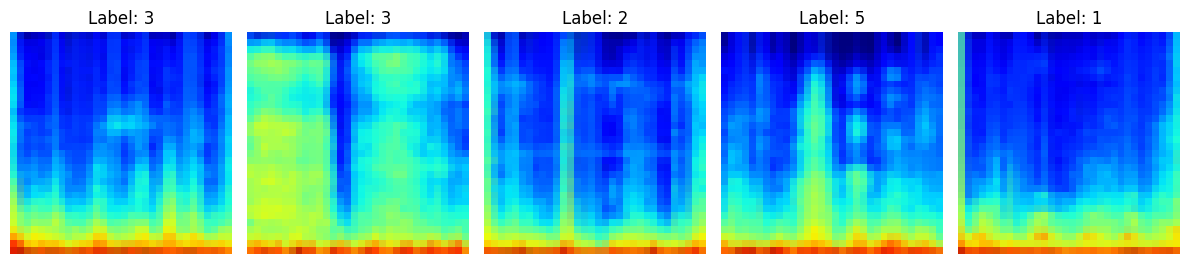

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(trainloader))
print(images.shape)  # Output: torch.Size([32, 4, 4, 4])  -> 32 images, 4 channel, 4x4 size
print(labels[:5])    # Print first 5 labels

# Function to display RGBA images
def show_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]
        if img.shape[2] == 4:  # Drop alpha channel if present
            img = img[:, :, :3]
        img = (img * 0.5) + 0.5  # De-normalize (from [-1, 1] to [0, 1])
        axes[i].imshow(img)
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

show_images(images, labels)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
import numpy as np

NUM_QUBITS = 4
QC_OUTPUTS = [f"{i:04b}" for i in range(16)]

class QiskitCircuit():
    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        self.thetas = [Parameter(f'theta_{i}') for i in range(2 * n_qubits)]
        self.build_circuit()

    def build_circuit(self):
        self.circuit = QuantumCircuit(self.n_qubits)

        self.circuit.h(range(self.n_qubits))
        for i in range(self.n_qubits):
            self.circuit.ry(self.thetas[i], i)

        # simplified entanglement
        for i in range(self.n_qubits - 1):
            self.circuit.cx(i, i + 1)

        for i in range(self.n_qubits):
            self.circuit.ry(self.thetas[i + self.n_qubits], i)

    def run(self, input_params):
        param_dict = {self.thetas[i]: float(input_params[i].item()) for i in range(2 * self.n_qubits)}
        bound_circuit = self.circuit.assign_parameters(param_dict, inplace=False)

        # Run with statevector simulator
        state = Statevector.from_instruction(bound_circuit)

        # Probabilities over computational basis
        probs = state.probabilities_dict()

        # Create output vector in order of QC_OUTPUTS
        expectation = np.array([probs.get(key, 0.0) for key in QC_OUTPUTS], dtype=np.float32)
        return expectation


In [ ]:
import torch
from torch.autograd import Function
import numpy as np

# Constants
NUM_QUBITS = 4
SHIFT = np.pi / 2

# Updated: no need to use AerSimulator
class TorchCircuit(Function):

    @staticmethod
    def forward(ctx, input_params):
        if not hasattr(ctx, 'qiskit_circuit'):
            ctx.qiskit_circuit = QiskitCircuit(NUM_QUBITS)



        input_params = input_params.detach().clone().requires_grad_(False).to(device) # move input to device
        exp_vals = ctx.qiskit_circuit.run(input_params)

        result = torch.tensor(exp_vals, dtype=torch.float32, device=device) # move the result tensor to the device
        ctx.save_for_backward(input_params, result)

        return result

    @staticmethod
    def backward(ctx, grad_output):
        input_params, _ = ctx.saved_tensors
        gradients = []

        # Parameter shift rule for gradient estimation
        for i in range(2 * NUM_QUBITS):
            shifted_right = input_params.clone()
            shifted_left = input_params.clone()
            shifted_right[i] += SHIFT
            shifted_left[i] -= SHIFT

            exp_right = ctx.qiskit_circuit.run(shifted_right)
            exp_left = ctx.qiskit_circuit.run(shifted_left)

            grad = (torch.tensor(exp_right, device=device) - torch.tensor(exp_left, device=device)) / 2.0 # move the tensors to the device
            gradients.append(grad)

        gradients = torch.stack(gradients, dim=1).to(device)  # shape: [output_dim, input_dim], move to device
        grad_input = torch.matmul(grad_output.float().unsqueeze(0), gradients).squeeze(0)

        return grad_input

In [ ]:
print("--- Drawing Quantum Circuit Structure (once) ---")
try:
    # Create a temporary instance just for drawing
    temp_qiskit_circuit = QiskitCircuit(NUM_QUBITS)
    circuit_structure = temp_qiskit_circuit.circuit
    circuit_structure.draw('mpl', style='clifford')
    plt.suptitle("Quantum Circuit Structure (Blueprint)")
    plt.show()
    print("-> Matplotlib plot displayed.")
except Exception as e:
    print(f"-> Matplotlib drawing failed ({e}). Drawing circuit as text:")
    try:
        # Recreate instance if needed, just to get text draw
        temp_qiskit_circuit = QiskitCircuit(NUM_QUBITS)
        print(temp_qiskit_circuit.circuit.draw('text'))
    except Exception as e2:
        print(f"-> Text drawing also failed: {e2}")
print("---------------------------------------------")

--- Drawing Quantum Circuit Structure (once) ---
-> Matplotlib drawing failed ("The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."). Drawing circuit as text:
     ┌───┐┌─────────────┐     ┌─────────────┐                              
q_0: ┤ H ├┤ Ry(theta_0) ├──■──┤ Ry(theta_4) ├──────────────────────────────
     ├───┤├─────────────┤┌─┴─┐└─────────────┘┌─────────────┐               
q_1: ┤ H ├┤ Ry(theta_1) ├┤ X ├───────■───────┤ Ry(theta_5) ├───────────────
     ├───┤├─────────────┤└───┘     ┌─┴─┐     └─────────────┘┌─────────────┐
q_2: ┤ H ├┤ Ry(theta_2) ├──────────┤ X ├────────────■───────┤ Ry(theta_6) ├
     ├───┤├─────────────┤          └───┘          ┌─┴─┐     ├─────────────┤
q_3: ┤ H ├┤ Ry(theta_3) ├─────────────────────────┤ X ├─────┤ Ry(theta_7) ├
     └───┘└─────────────┘                         └───┘     └─────────────┘
---------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Updated to match 4-channel input
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)   # [32x32] → [16x32x32]
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # [32x32] → [32x32x32]
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # [32x32] → [64x32x32]

        self.pool = nn.MaxPool2d(2, 2)  # Halves spatial dims each time

        # After 3 conv + pool layers: [64, 4, 4] (32 → 16 → 8 → 4)
        self.fc4 = nn.Linear(64 * 4 * 4, 2 * NUM_QUBITS)  # Generate quantum circuit parameters

        self.qc = TorchCircuit.apply  # Quantum layer

        self.fc5 = nn.Linear(len(QC_OUTPUTS), 6)  # Final classifier layer

    def forward(self, x):
        # x shape: [batch_size, 4, 32, 32]
        x = self.pool(F.relu(self.conv1(x)))  # → [16, 16, 16]
        x = self.pool(F.relu(self.conv2(x)))  # → [32, 8, 8]
        x = self.pool(F.relu(self.conv3(x)))  # → [64, 4, 4]

        x = x.view(x.size(0), -1)  # Flatten → [batch_size, 64*4*4 = 1024]
        x = self.fc4(x)            # → [batch_size, 2 * NUM_QUBITS]
        x = np.pi * torch.tanh(x)

        # Quantum layer is run on each input in batch
        qc_out = []
        for i in range(x.size(0)):
            out = self.qc(x[i])
            qc_out.append(out)

        x = torch.stack(qc_out)  # → [batch_size, len(QC_OUTPUTS)]
        x = F.relu(x)
        x = self.fc5(x.float())
        x = F.softmax(x, dim=1)
        return x

    def predict(self, x):
        with torch.no_grad():
            pred = self.forward(x)
            return torch.argmax(pred, dim=1).item()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Initialize model, loss function, and optimizer
network = Net().to(device)  # Ensure model is on the correct device
optimizer = optim.Adam(network.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

# Training loop
epochs = 15
train_losses = []

for epoch in range(epochs):
    network.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)  # Move to device

        optimizer.zero_grad()

        # Forward pass
        output = network(data)
        loss = loss_func(output, target)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        print(f"\r[Epoch {epoch+1}/{epochs}] Batch {batch_idx+1}/{len(trainloader)} - Loss: {loss.item():.4f}", end='')

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"\nEpoch {epoch+1} complete. Average Loss: {avg_loss:.4f}")


[Epoch 1/15] Batch 106/106 - Loss: 1.8185
Epoch 1 complete. Average Loss: 1.7749
[Epoch 2/15] Batch 106/106 - Loss: 1.7803
Epoch 2 complete. Average Loss: 1.7608
[Epoch 3/15] Batch 106/106 - Loss: 1.7977
Epoch 3 complete. Average Loss: 1.7459
[Epoch 4/15] Batch 106/106 - Loss: 1.7069
Epoch 4 complete. Average Loss: 1.7285
[Epoch 5/15] Batch 106/106 - Loss: 1.6714
Epoch 5 complete. Average Loss: 1.7096
[Epoch 6/15] Batch 106/106 - Loss: 1.6700
Epoch 6 complete. Average Loss: 1.6863
[Epoch 7/15] Batch 106/106 - Loss: 1.7503
Epoch 7 complete. Average Loss: 1.6500
[Epoch 8/15] Batch 106/106 - Loss: 1.4274
Epoch 8 complete. Average Loss: 1.6062
[Epoch 9/15] Batch 106/106 - Loss: 1.4980
Epoch 9 complete. Average Loss: 1.5724
[Epoch 10/15] Batch 106/106 - Loss: 1.5409
Epoch 10 complete. Average Loss: 1.5504
[Epoch 11/15] Batch 106/106 - Loss: 1.4237
Epoch 11 complete. Average Loss: 1.5184
[Epoch 12/15] Batch 106/106 - Loss: 1.4375
Epoch 12 complete. Average Loss: 1.4994
[Epoch 13/15] Batch 10

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels = []
pred_labels = []

# Collect predictions
network.eval()
with torch.no_grad():
    for i in range(len(train_dataset)):
        sample, label = train_dataset[i]
        pred = network.predict(sample.unsqueeze(0).to(device))
        true_labels.append(label)
        pred_labels.append(pred)

# Confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels, labels=list(range(6)))
print("Confusion Matrix:\n", conf_mat)

# Convert to numpy
conf_mat = np.array(conf_mat, dtype=np.float32)

# Overall accuracy
overall_accuracy = np.trace(conf_mat) / np.sum(conf_mat)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Sensitivity and Specificity for each class
print("\nClass-wise Metrics:")
for i in range(6):
    TP = conf_mat[i, i]
    FN = np.sum(conf_mat[i, :]) - TP
    FP = np.sum(conf_mat[:, i]) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    class_accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0

    print(f"Class {i}: Accuracy: {class_accuracy:.4f}, Sensitivity (Recall): {sensitivity:.4f}, Specificity: {specificity:.4f}")


Confusion Matrix:
[[349   0   0   0   0   2]
 [ 11 235   4   8   3  29]
 [  0   0 627   1   1   0]
 [  0   0   0 761   5   0]
 [  0   0   0   0 797   1]
 [  0   0   5   4   5 524]]

Overall Accuracy: 0.9780

Class-wise Metrics:
Class 0: Accuracy: 0.9961, Sensitivity (Recall): 0.9943, Specificity: 0.9964
Class 1: Accuracy: 0.9837, Sensitivity (Recall): 0.8103, Specificity: 1.0000
Class 2: Accuracy: 0.9982, Sensitivity (Recall): 0.9968, Specificity: 0.9985
Class 3: Accuracy: 0.9944, Sensitivity (Recall): 0.9935, Specificity: 0.9946
Class 4: Accuracy: 0.9958, Sensitivity (Recall): 0.9987, Specificity: 0.9949
Class 5: Accuracy: 0.9878, Sensitivity (Recall): 0.9831, Specificity: 0.9887


In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels = []
pred_labels = []

# Collect predictions
network.eval()
with torch.no_grad():
    for i in range(len(test_dataset)):
        sample, label = test_dataset[i]
        pred = network.predict(sample.unsqueeze(0).to(device))
        true_labels.append(label)
        pred_labels.append(pred)

# Confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels, labels=list(range(6)))
print("Confusion Matrix:\n", conf_mat)

# Convert to numpy
conf_mat = np.array(conf_mat, dtype=np.float32)

# Overall accuracy
overall_accuracy = np.trace(conf_mat) / np.sum(conf_mat)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Sensitivity and Specificity for each class
print("\nClass-wise Metrics:")
for i in range(6):
    TP = conf_mat[i, i]
    FN = np.sum(conf_mat[i, :]) - TP
    FP = np.sum(conf_mat[:, i]) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    class_accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0

    print(f"Class {i}: Accuracy: {class_accuracy:.4f}, Sensitivity (Recall): {sensitivity:.4f}, Specificity: {specificity:.4f}")


Confusion Matrix:
[[ 82   0   0   0   0   0]
 [  5  57   1   4   1  12]
 [  0   1 150   1   0   0]
 [  0   0   3 177   3   1]
 [  0   0   1   0 185   1]
 [  0   0   0   0   1 121]]

Overall Accuracy: 95.6600

Class-wise Metrics:
Class 0: Accuracy: 0.9938, Sensitivity (Recall): 1.0000, Specificity: 0.9931
Class 1: Accuracy: 0.9703, Sensitivity (Recall): 0.7125, Specificity: 0.9986
Class 2: Accuracy: 0.9913, Sensitivity (Recall): 0.9868, Specificity: 0.9924
Class 3: Accuracy: 0.9851, Sensitivity (Recall): 0.9620, Specificity: 0.9920
Class 4: Accuracy: 0.9913, Sensitivity (Recall): 0.9893, Specificity: 0.9919
Class 5: Accuracy: 0.9814, Sensitivity (Recall): 0.9918, Specificity: 0.9796
